<a href="https://colab.research.google.com/github/yeonghun00/real-estate/blob/main/my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import json

url = 'https://api.kbland.kr/land-extra/statistics/reference?%EC%A3%BC%EC%9B%94%EA%B0%84%EA%B5%AC%EB%B6%84=1&%EA%B8%B0%EC%A4%80%EB%85%84%EC%9B%94%EC%8B%9C%EC%9E%91%EC%9D%BC=2022-01-01&%EA%B8%B0%EC%A4%80%EB%85%84%EC%9B%94%EC%A2%85%EB%A3%8C%EC%9D%BC=2022-12-31'
data = requests.get(url).text
data = json.loads(data)
download_url = data['dataBody']['data']['시계열'][0]['이미지도메인URL'] + data['dataBody']['data']['시계열'][0]['파일경로'] + '/' + data['dataBody']['data']['시계열'][0]['파일명']
xls = pd.ExcelFile('https://file.kbland.kr/image/kbstar/land/statc/tmsr/monthly/ef7684fbb2e40b67.xlsx')

In [2]:
download_url

'https://file.kbland.kr/image/kbstar/land/statc/tmsr/monthly/22b9a1ab69705d4d.xlsx'

In [3]:
xls.sheet_names

['시계열',
 '안내',
 '★기간비교',
 '★지역비교',
 '1.매매종합',
 '2.매매APT',
 '3.매매단독',
 '4.매매연립',
 '5.전세종합',
 '6.전세APT',
 '7.전세단독',
 '8.전세연립',
 '9.KB아파트 월세지수+',
 '11.PIR(월별)',
 '12.J-PIR(월별)',
 '13.KB아파트담보대출PIR',
 '14.NEW_HAI',
 '15.KB-HOI',
 '16.선도50',
 '21.매수우위',
 '22.매매거래',
 '23.전세수급',
 '24.전세거래',
 '25.KB부동산 매매가격 전망지수',
 '26.KB부동산 전세가격 전망지수',
 '27.종합매매전세비',
 '28.아파트매매전세비',
 '29.단독매매전세비',
 '30.연립매매전세비',
 '31.전용면적별(구)APT매매',
 '32.면적별매매종합',
 '33.면적별단독매매',
 '34.면적별연립매매',
 '35.전용면적별(구)APT전세',
 '36.면적별전세종합',
 '37.면적별단독전세',
 '38.면적별연립전세',
 '39.전용면적별APT매매지수',
 '40.전용면적별APT전세지수',
 '41.평균매매',
 '42.평균전세',
 '43.중위매매',
 '44.중위전세',
 '45.㎡당평균매매',
 '46.㎡당평균전세',
 '47.㎡당아파트평균매매',
 '48.㎡당아파트평균전세',
 '49.㎡당 5분위 아파트 매매',
 '50.㎡당 5분위 아파트전세',
 '51.5분위(종합매매)',
 '52.5분위(종합전세)',
 '53.5분위(아파트매매)',
 '54.5분위(아파트전세)',
 '55.면적별(구)APT매매평균',
 '56.면적별(구)APT전세평균',
 '57.면적별APT매매평균',
 '58.면적별APT전세평균',
 '59.전월세전환율',
 '60.KB 오피스텔']

**1. Housing purchase price composite indices**




매매종합

In [4]:
hpi_df = pd.read_excel(xls, '1.매매종합', header=3)

In [5]:
hpi_df = hpi_df[:hpi_df[hpi_df['Classification'].isnull()].index[0]]

In [6]:
# Date Formatting
from datetime import datetime

def date_format(df):
  c = []
  year = 0
  for i in df['Classification']:
    if str(i)[-1] == '1':
      year = str(i)[:-2]
      if len(year) < 3: c.append('19' + year + '/1')
      else: c.append(year + '/1')
    else:
      if len(year) < 3: c.append('19' + year + '/' + str(int(i)))
      else: c.append(year + '/' + str(int(i)))
  c = [datetime.strptime(x, '%Y/%m') for x in c] 
  df['Classification'] = c
  return df.set_index('Classification')

In [7]:
hpi_df = date_format(hpi_df)

In [8]:
hpi_df

,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,Seodaemun-gu,Seongdong-gu,Seongbuk-gu,Yongsan-gu,Eunpyeong-gu,Jongno-gu,Jung-gu,Jungnang-gu,Southern Seoul,Gangnam-gu,Gangdong-gu,Gangseo-gu,Gwanak-gu,Guro-gu,Geumcheon-gu,Dongjak-gu,Seocho-gu,Songpa-gu,Yangcheon-gu,Yeongdeungpo-gu,6 Large Cities,Busan,Jung-gu.1,Seo-gu,Dong-gu,Yeongdo-gu,Busanjin-gu,Dongnae-gu,Nam-gu,Buk-gu,Haeundae-gu,...,Gongju,Asan,Nonsan,Gyeryong,Dangjin,Seosan,Jeollabuk-do,Jeonju,Wansan-gu,Deokjin-gu,Iksan-si,Gunsan,Jeollanam-do,Mokpo,Suncheon,Gwangyang,Yeosu,Gyeongsangbuk-do,Pohang,Nam-gu.4,Buk-gu .1,Gumi,Gyeongsan,Andong,Gimcheon,Gyeongsangnam-do,Changwon,Masan happo,Masan hoiwon,Sungsan,Uichang,Jinhae,Yangsan,Geoje,Jinju,Gimhae,Tongyoung,Jeju-do,Jeju/\nSeogwipo,Non-Metropolitan Area
Classification,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1986-01-01,34.656084,30.043817,41.939986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.644771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.438769,35.903183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.932099,NaN,NaN,48.538563,NaN,NaN,84.930034,91.856904,NaN,NaN,NaN,56.254519,NaN,NaN,44.179562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-02-01,34.656084,30.043817,41.88915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.679662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.438769,35.903183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.932099,NaN,NaN,48.538563,NaN,NaN,85.387139,91.856904,NaN,NaN,NaN,56.254519,NaN,NaN,44.344719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-01,34.707965,30.002377,41.88915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.609879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.779526,36.462229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.774448,NaN,NaN,48.538563,NaN,NaN,85.387139,91.967575,NaN,NaN,NaN,56.254519,NaN,NaN,44.179562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-04-01,34.448563,29.836618,41.736641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.365636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.325183,35.841067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.459146,NaN,NaN,48.538563,NaN,NaN,85.387139,91.967575,NaN,NaN,NaN,57.046836,NaN,NaN,44.509876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-05-01,34.292922,29.587979,41.279114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.260961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.268390,35.778951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.301495,NaN,NaN,48.759193,NaN,NaN,85.387139,91.635562,NaN,NaN,NaN,57.046836,NaN,NaN,44.427298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,121.591133,124.952358,126.037762,124.599371,116.192987,144.950073,133.062383,124.383338,124.885848,120.289067,124.127025,124.552424,119.701425,122.851077,118.315351,119.876435,119.949602,123.896686,120.726717,117.759025,120.437774,116.629640,128.002914,121.608595,122.352604,122.554574,129.446805,132.568084,127.384677,120.355668,116.611914,100.178579,101.221271,103.643530,105.945849,112.619803,115.757970,121.012053,108.724864,142.132829,...,109.665704,111.506207,101.567130,NaN,NaN,NaN,104.724900,103.358548,103.218950,103.520087,104.058448,108.467396,105.126091,95.337317,108.669109,NaN,109.494279,105.711498,108.822584,106.128680,110.863814,105.112833,100.751647,NaN,NaN,104.865871,104.727315,97.681821,99.975017,113.7

In [9]:
s = hpi_df.iloc[0].isna() == False
cities = s[s].index.values
cities = ['Total', 'Seoul', 'Busan']

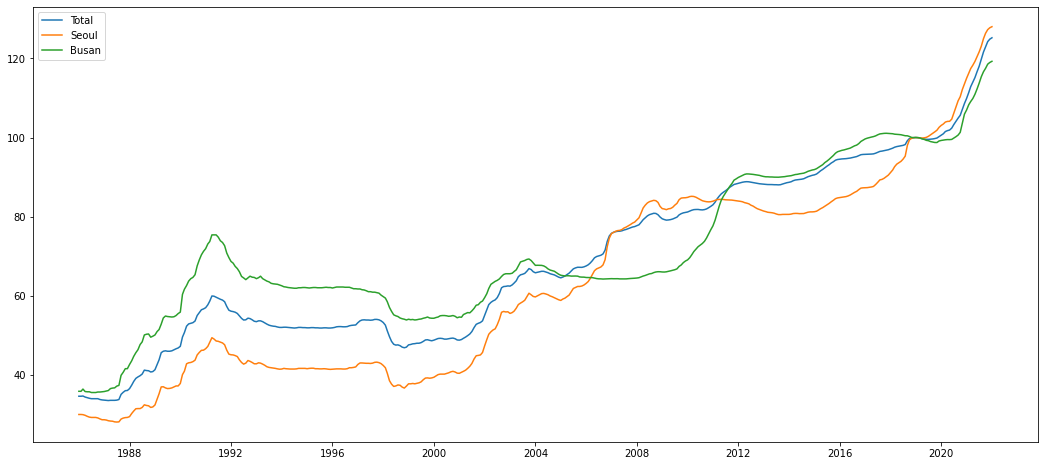

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(hpi_df[city])
plt.legend(cities)
plt.show()


**2. Housing jeonse price composite indices**

In [11]:
hjp_df = pd.read_excel(xls, '5.전세종합', header=3)
hjp_df = date_format(hjp_df)

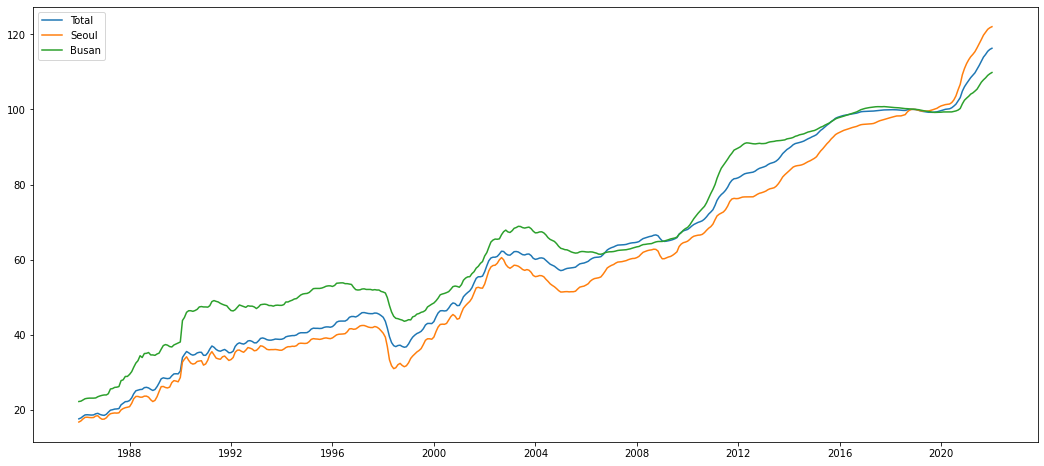

In [12]:
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(hjp_df[city])
plt.legend(cities)
plt.show()



**3. Ratio of jeonse to purchase price for housing**

종합매매전세비

In [13]:
rjp_df = pd.read_excel(xls, '27.종합매매전세비', header=2)
rjp_df = rjp_df[:rjp_df[rjp_df['Unnamed: 0'].isnull()].index[0]]

In [14]:
def date_format2(df):
  dates = []
  y = 0
  for d in df['Unnamed: 0']:
    if type(d) == str: 
      y = d[d.find("'")+1:d.find('.')]
      dates.append(y+'/'+(d[d.find('.')+1:]))
    else: dates.append(y+'/'+str(d))

  dates = [datetime.strptime(x, '%y/%m') for x in dates] 
  df['Unnamed: 0'] = dates
  return df.set_index('Unnamed: 0')

In [15]:
rjp_df = date_format2(rjp_df)
rjp_df

,Total,Seoul,Northern seoul,Southern Seoul,6 Large Cities,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,5 Large Cities,Seoul Metropolitan Area,Sejong,Gyeonggi-do,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju/\nSeogwipo,Non Metropolitan Area
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,54.995742,47.081021,47.997733,46.176432,60.233835,61.318798,63.457160,48.018278,67.120289,63.583149,65.725002,-,48.853085,-,50.685280,57.278134,60.911362,57.325058,62.368713,58.000384,64.134851,59.420633,58.532243,59.998121
2011-07-01,55.183782,47.523669,48.365536,46.692933,60.198286,61.285864,63.495761,48.182729,67.111239,63.018937,65.673346,-,49.254033,-,51.113110,57.375782,60.730726,57.584254,62.092936,58.046818,64.282477,59.371579,58.498286,59.993477
2011-08-01,55.512878,48.227905,49.074596,47.392409,60.237012,61.290853,63.597096,48.428823,67.177023,62.631847,65.688432,-,49.887992,-,51.789446,57.151037,60.913197,57.895829,61.790934,57.940809,64.251640,59.353343,59.131604,59.991193
2011-09-01,55.968106,49.027421,49.939968,48.126941,60.419438,61.311359,63.815651,48.915756,67.494405,62.460214,65.847618,-,50.665097,-,52.625557,57.394449,61.049273,58.135446,61.577714,58.153763,64.208594,59.514929,59.100398,60.084697
2011-10-01,56.243344,49.488306,50.423850,48.565133,60.537230,61.350345,63.930203,49.319463,67.569968,62.312969,65.930290,-,51.138259,-,53.128813,57.415263,61.087234,58.258976,61.468952,58.373476,64.244927,59.650789,59.134717,60.155035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,63.2698,58.280457,58.613469,57.956567,63.599073,58.420905,65.889796,66.569465,64.976803,62.799458,66.138360,62.700121,61.904466,44.455802,63.649056,67.200800,68.811533,70.391542,70.427371,65.390562,71.234557,66.297696,58.447581,67.226934
2021-10-01,63.011851,57.990684,58.268375,57.720599,63.369867,58.316487,65.942242,66.009149,64.477175,62.554941,66.192584,62.571121,61.557384,44.541005,63.314921,66.933369,68.701395,70.043359,70.167920,65.412210,70.978560,66.212202,58.214475,67.045749
2021-11-01,62.839714,57.954194,58.325468,57.593089,63.118282,58.192551,66.028084,65.551069,63.682388,62.164308,66.287178,62.382029,61.374601,44.586876,63.086993,65.858817,68.578606,70.052056,69.876478,65.352161,71.160042,66.215128,57.903716,66.918140


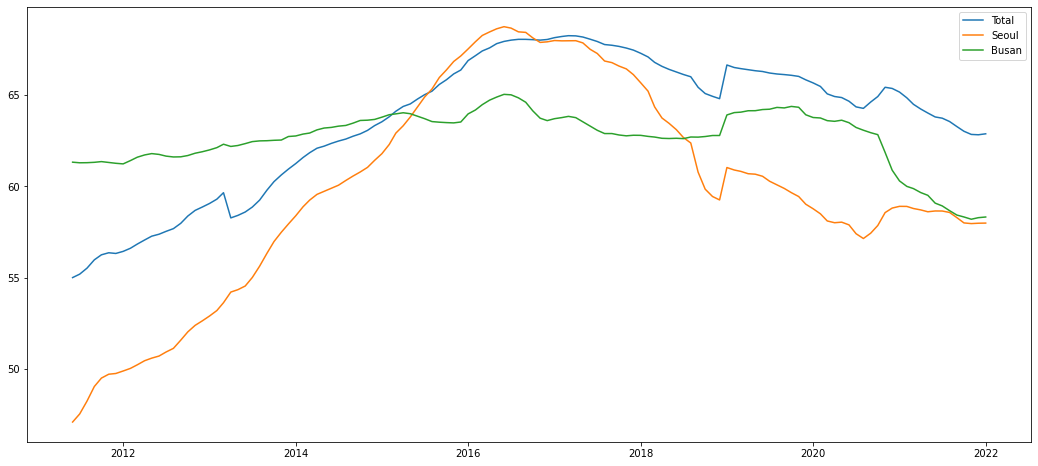

In [16]:
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(rjp_df[city])
plt.legend(cities)
plt.show()

아파트매매전세비 (Ratio of Jeonse to Purchase Price for Apartment)

In [17]:
rja_df = pd.read_excel(xls, '28.아파트매매전세비', header=2)
rja_df = rja_df[:rja_df[rja_df['Unnamed: 0'].isnull()].index[0]]

In [18]:
rja_df = date_format2(rja_df)
rja_df

,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,Seodaemun-gu,Seongdong-gu,Seongbuk-gu,Yongsan-gu,Eunpyeong-gu,Jongno-gu,Jung-gu,Jungnang-gu,Southern Seoul,Gangnam-gu,Gangdong-gu,Gangseo-gu,Gwanak-gu,Guro-gu,Geumcheon-gu,Dongjak-gu,Seocho-gu,Songpa-gu,Yangcheon-gu,Yeongdeungpo-gu,6 Large Cities,Busan,Jung-gu.1,Seo-gu,Dong-gu,Yeongdo-gu,Busanjin-gu,Dongnae-gu,Nam-gu,Buk-gu,Haeundae-gu,...,Ilsanseo-gu,Anyang,Manan-gu,Dongan-gu,Bucheon,Uijeongbu,Gwangmyeong,Pyeongtaek,Ansan,Danwon-gu,Sangrok-gu,Gwacheon,Guri,Namyangju,Yongin,Cheoin-gu,Giheung-gu,Suji-gu,Siheung,Gunpo,Uiwang,Hanam,Osan,Paju,Icheon,Anseong,Gimpo,Yangju,Dongducheon,Gwangju.1,Hwaseong,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju/\nSeogwipo,Non Metropolitan Area
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1998-12-01,50.823605,47.919568,49.900000,-,-,-,-,-,-,-,-,-,-,-,-,-,-,46.700000,-,-,-,-,-,-,-,-,-,-,-,52.901175,56.000000,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,50.595563
1999-01-01,51.640135,48.710126,51.000000,-,-,-,-,-,-,-,-,-,-,-,-,-,-,47.300000,-,-,-,-,-,-,-,-,-,-,-,53.724123,56.700000,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,51.423717
1999-02-01,53.52714,51.415018,54.200000,-,-,-,-,-,-,-,-,-,-,-,-,-,-,49.700000,-,-,-,-,-,-,-,-,-,-,-,55.040972,57.200000,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,53.358133
1999-03-01,54.8,52.800000,55.900000,-,-,-,-,-,-,-,-,-,-,-,-,-,-,50.900000,-,-,-,-,-,-,-,-,-,-,-,56.200000,58.100000,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,54.600000
1999-04-01,55.6,53.600000,56.800000,-,-,-,-,-,-,-,-,-,-,-,-,-,-,51.700000,-,-,-,-,-,-,-,-,-,-,-,57.000000,58.800000,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,55.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,66.536122,54.901862,56.044984,59.435088,54.508668,51.383775,54.343548,57.758002,55.014991,56.231357,53.281167,62.560547,52.332659,61.513736,62.402638,61.383403,60.095363,53.897179,52.561492,54.588923,55.58093,60.975569,57.179996,59.391988,53.646966,54.953944,50.380798,53.998407,48.030718,67.026917,61.087221,70.132922,67.142636,67.858776,62.437053,68.654676,54.190888,59.498,69.082025,47.262148,...,71.194608,61.188421,64.325706,59.639975,64.306141,68.669872,57.745827,72.159249,64.516551,65.257241,63.547255,43.975889,58.526153,68.961443,67.594709,71.878372,68.479576,65.750967,66.581129,59.727555,61.101283,65.78083,70.030632,71.801357,75.973382,73.329641,69.078212,69.719987,67.322008,75.55991,65.098388,77.002879,76.387579,78.875742,76.603148,75.212275,77.395891,73.308782,59.761196,74.887720
2021-10-01,66.193077,54.552006,55.729930,59.03687,54.439568,51.065819,54.111442,57.448084,54.887065,55.912469,52.94263,62.21905,52.184587,61.166277,61.847454,60.96187,59.404106,53.516737,52.286742,54.232592,54.95672,60.644235,56.947211,59.189484,53.204566,54.546825,49.799852,53.801298,47.701402,66.707464,60.909785,70.499101,66.778137,67.634474,61.891182,68.903279,53.602133,59.415573,68.920305,47.52133,...,70.592431,60.544238,63.641113,59.015737,64.063315,68.354883,58.133767,71.464636,64.336598,65.59059,62.695576,43.860483,58.303476,68.360024,66.951359,70.781028,67.821613,65.222784,67.284702,58.645855,60.739014,65.499213,70.164542,71.801996,74.675804,73.260379,69.033963,69.294801,66.919329,75.037044,64.096669,76.765991,76.138317,78.292624,76.237765,75.285979,77.046152,73.222561,58.478979,74.626144
2021-11-01,65.93233,54.

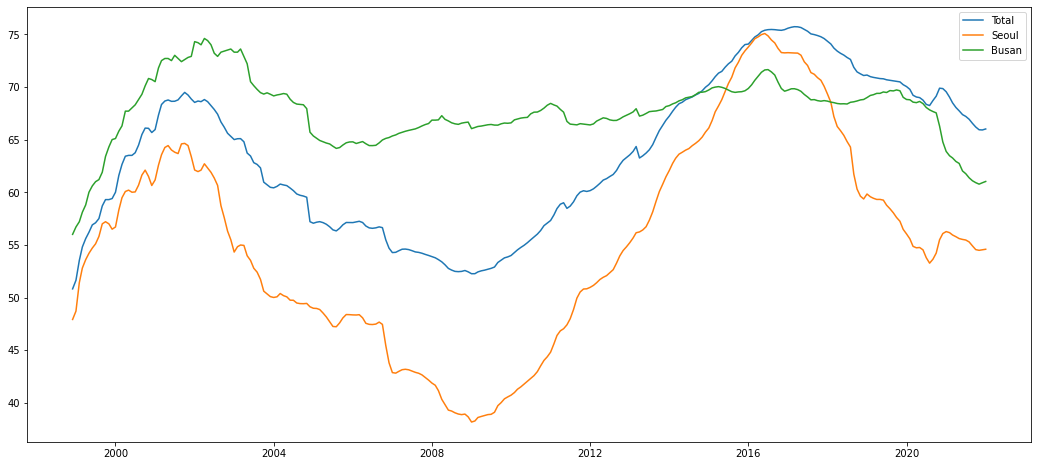

In [19]:
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(rja_df[city])
plt.legend(cities)
plt.show()

단독매매전세비 (Ratio of Jeonse to Purchase Price for Houses)

In [20]:
rjs_df = pd.read_excel(xls, '29.단독매매전세비', header=2)
rjs_df = rjs_df[:rjs_df[rjs_df['Unnamed: 0'].isnull()].index[0]]

In [21]:
rjs_df = date_format2(rjs_df)
rjs_df

,Total,Seoul,Northern seoul,Southern Seoul,6 Large Cities,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,5 Large Cities,Seoul Metropolitan Area,Gyeonggi-do,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju/\nSeogwipo,Non Metropolitan Area
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,41.627113,38.441690,38.126422,38.955217,42.405526,42.130103,46.375177,35.479358,44.723173,38.094591,43.711373,-,39.518519,41.887302,-,-,-,-,-,-,-,-,42.719251
2011-07-01,41.703667,38.529653,38.202347,39.062787,42.577853,42.562296,46.366638,35.591744,44.875598,38.116720,43.687336,-,39.611301,41.981340,-,-,-,-,-,-,-,-,42.677803
2011-08-01,41.751069,38.694305,38.360069,39.238728,42.598380,42.640337,46.426340,35.604839,44.883471,37.852548,43.747975,-,39.731339,42.071244,-,-,-,-,-,-,-,-,42.656705
2011-09-01,41.834529,38.873142,38.582773,39.346111,42.700517,42.896371,46.526961,35.737573,44.847906,37.615406,43.831423,-,39.826049,42.049706,-,-,-,-,-,-,-,-,42.712144
2011-10-01,41.867685,38.975295,38.698925,39.425463,42.653598,42.899507,46.527700,35.463011,44.707151,37.686319,43.770747,-,39.924175,42.235119,-,-,-,-,-,-,-,-,42.708748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,45.874469,41.942836,42.450275,41.128280,44.113283,43.819269,45.294756,43.788247,45.025767,40.468243,45.702596,44.152687,43.894237,45.933666,36.790959,49.806393,51.091543,53.367999,51.350799,52.255931,43.664523,53.428844,48.883081
2021-10-01,45.87511,41.934089,42.478426,41.060305,44.126285,43.838447,45.350598,43.824352,45.025767,40.391186,45.693526,44.162888,43.899192,45.946122,36.790959,49.806393,51.091543,53.340196,51.292325,52.25911,43.664523,53.428844,48.873051
2021-11-01,45.859302,41.913392,42.471911,41.016843,44.133148,43.833702,45.386127,43.835118,45.025767,40.391186,45.685868,44.169278,43.859374,45.875724,36.790959,49.806393,51.091543,53.340196,51.201854,52.25911,43.667798,53.428844,48.863191


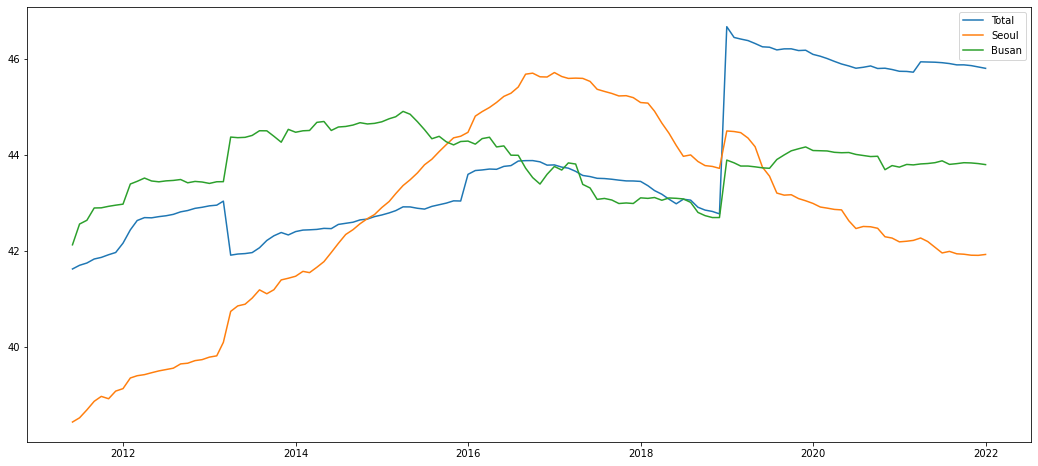

In [22]:
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(rjs_df[city])
plt.legend(cities)
plt.show()

연립매매전세비 (Ratio of Jeonse to Purchase Price for Flats)

In [23]:
rjf_df = pd.read_excel(xls, '30.연립매매전세비', header=2)
rjf_df = rjf_df[:rjf_df[rjf_df['Unnamed: 0'].isnull()].index[0]]

In [24]:
rjf_df = date_format2(rjf_df)
rjf_df

,Total,Seoul,Northern seoul,Southern Seoul,6 Large Cities,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,5 Large Cities,Seoul Metropolitan Area,Gyeonggi-do,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju/\nSeogwipo,Non Metropolitan Area
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,57.889982,53.186044,53.483539,52.870716,63.938152,72.077696,69.853073,53.269079,60.193371,74.242168,77.231918,-,53.511673,54.080743,-,-,-,-,-,-,-,-,69.136849
2011-07-01,58.115027,53.564782,53.736096,53.383199,64.000812,72.231608,70.030944,53.333693,60.184939,74.029840,77.037877,-,53.805426,54.365827,-,-,-,-,-,-,-,-,69.072545
2011-08-01,58.468538,54.263297,54.502272,54.009997,64.063925,72.297658,70.087227,53.631547,60.088102,73.272217,76.651098,-,54.296368,54.660299,-,-,-,-,-,-,-,-,69.119553
2011-09-01,58.904105,54.841740,55.282023,54.375065,64.305584,72.122218,70.089284,54.031956,60.025041,74.400285,76.993255,-,54.854577,55.265817,-,-,-,-,-,-,-,-,69.081760
2011-10-01,59.204072,55.286643,55.674153,54.875905,64.343735,71.879809,70.109253,54.275958,60.066459,74.367360,77.031078,-,55.287029,55.771063,-,-,-,-,-,-,-,-,69.021412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,68.47782,69.738142,69.973376,69.511818,67.948911,64.429801,67.960645,69.913063,68.653783,72.149729,66.949291,66.509087,68.621172,66.518153,74.486536,71.158752,73.195846,73.254841,67.238713,75.130242,70.478284,65.60813,70.604698
2021-10-01,68.323236,69.446071,69.411977,69.478873,67.864333,64.443607,68.008927,69.672392,68.653783,72.099908,67.161999,66.538934,68.409110,66.429214,74.486536,71.158752,73.207483,73.195513,67.27816,75.130242,70.478284,65.60813,70.601448
2021-11-01,68.292708,69.455483,69.424939,69.484871,67.843142,64.367248,68.010475,69.668220,68.653783,72.160438,67.161999,66.505268,68.374808,66.321401,74.486536,71.158752,73.191851,73.195513,67.27816,75.111536,70.53808,65.60813,70.606167


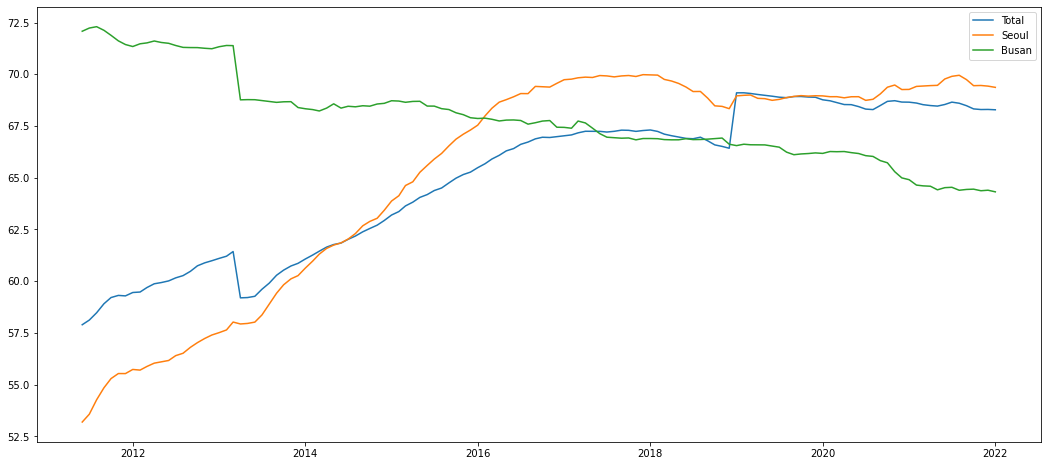

In [25]:
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(rjf_df[city])
plt.legend(cities)
plt.show()

Housing affordability index


**4. Trade index**

Trends on the Sell / Buy activities by region

In [26]:
ta_df = pd.read_excel(xls, '21.매수우위', header=1, usecols="A:CS")
ta_df['Unnamed: 0'].fillna(method='bfill', inplace=True)
ta_df = ta_df[:ta_df[ta_df['Unnamed: 0'].isnull()].index[0]]
ta_df = date_format2(ta_df)
ta_df

,전국 Total,Unnamed: 2,Unnamed: 3,Unnamed: 4,서울 Seoul,Unnamed: 6,Unnamed: 7,Unnamed: 8,강북 Northern seoul,Unnamed: 10,Unnamed: 11,Unnamed: 12,강남 Southern Seoul,Unnamed: 14,Unnamed: 15,Unnamed: 16,6개광역시 6 Large Cities,Unnamed: 18,Unnamed: 19,Unnamed: 20,부산 Busan,Unnamed: 22,Unnamed: 23,Unnamed: 24,대구 Daegu,Unnamed: 26,Unnamed: 27,Unnamed: 28,인천 Incheon,Unnamed: 30,Unnamed: 31,Unnamed: 32,광주 Gwangju,Unnamed: 34,Unnamed: 35,Unnamed: 36,대전 Daejeon,Unnamed: 38,Unnamed: 39,Unnamed: 40,...,경기 Gyeonggi-do,Unnamed: 58,Unnamed: 59,Unnamed: 60,강원 Gangwon-do,Unnamed: 62,Unnamed: 63,Unnamed: 64,충북 Chungcheongbuk-do,Unnamed: 66,Unnamed: 67,Unnamed: 68,충남 Chungcheongnam-do,Unnamed: 70,Unnamed: 71,Unnamed: 72,전북 Jeollabuk-do,Unnamed: 74,Unnamed: 75,Unnamed: 76,전남 Jeollanam-do,Unnamed: 78,Unnamed: 79,Unnamed: 80,경북 Gyeongsangbuk-do,Unnamed: 82,Unnamed: 83,Unnamed: 84,경남 Gyeongsangnam-do,Unnamed: 86,Unnamed: 87,Unnamed: 88,기타지방 Non Metropolitan Area,Unnamed: 90,Unnamed: 91,Unnamed: 92,제주 Jeju,Unnamed: 94,Unnamed: 95,Unnamed: 96
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,...,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수,매도자 많음,매수자 많음,비슷함,매수우위지수
2000-01-01,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,...,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index,Seller's No.> Buyer's No.,Seller's No.< Buyer's No.,Seller's No.≒Buyer's No.,Buyer Superiority Index
2000-01-01,72.534464,4.984093,22.481442,32.449629,60.346696,6.608884,33.04442,46.262189,-,-,-,-,-,-,-,-,75.102881,4.62963,20.26749,29.526749,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,NaN,-,-,-,NaN,-,-,-,NaN,-,-,-,NaN,-,-,-,NaN,-,-,-,NaN,-,-,-,NaN,-,83.281412,3.946002,12.772586,20.66459,NaN,NaN,NaN,NaN
2000-02-01,79.1231

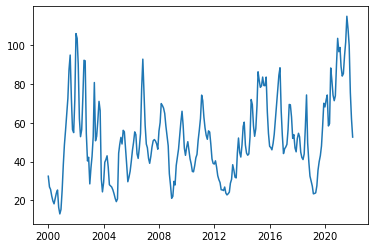

In [27]:
plt.plot(ta_df['Unnamed: 4'][2:])